In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import zscore

In [2]:
'''
Defining function to apply softiron offsets depending on voltage
 '''

def calc_softirons(pwm_num, voltage):

  voltage = round(voltage,1)
  if (voltage < 3.6): voltage = 3.6
  if (voltage > 4.2): voltage = 4.2

  softirons = pd.read_csv(str(os.getcwd())+'/mag_calibration/softironcoefs_newboard.csv').drop(columns=['Unnamed: 0'])
  # softirons = softirons['4.0v']
  softirons = softirons[str(voltage)+'v']

  pwmY_ox_1 = softirons[0];
  pwmY_ox_2 = softirons[1];
  pwmY_ox_3 = softirons[2];
  pwmY_oy_1 = softirons[3];
  pwmY_oy_2 = softirons[4];
  pwmY_oy_3 = softirons[5];
  pwmY_oz_1 = softirons[6];
  pwmY_oz_2 = softirons[7];
  pwmY_oz_3 = softirons[8];

  pwmY_ox = (pwmY_ox_1 * pwm_num) + (pwmY_ox_2 * pow(pwm_num, 2)) + (pwmY_ox_3 * pow(pwm_num, 3));
  pwmY_oy = (pwmY_oy_1 * pwm_num) + (pwmY_oy_2 * pow(pwm_num, 2)) + (pwmY_oy_3 * pow(pwm_num, 3));
  pwmY_oz = (pwmY_oz_1 * pwm_num) + (pwmY_oz_2 * pow(pwm_num, 2)) + (pwmY_oz_3 * pow(pwm_num, 3));

  return pwmY_ox, pwmY_oy, pwmY_oz


/var/folders/w_/5p7jcd6s6qq70g019q88r1mr0000gn/T/ipykernel_2238/980791001.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('test_random_voltage.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])


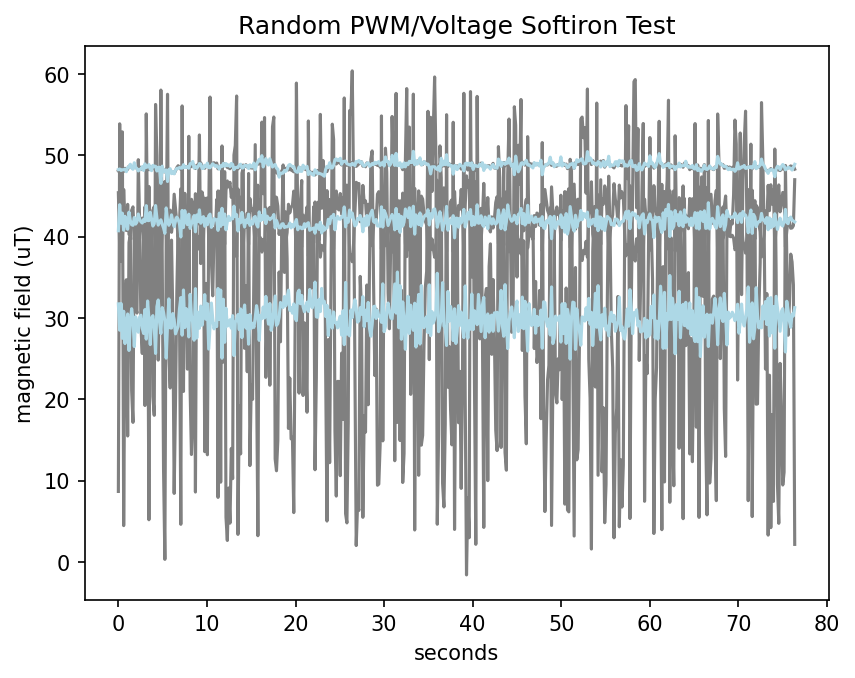

In [ ]:
# data = pd.read_csv(str(os.getcwd())+'/data/take1/4.0v_test.txt', header=1, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])
# data = pd.read_csv('test_linear.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])
# data = pd.read_csv('test_rlinear.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])
# data = pd.read_csv('test_random.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])
# data = pd.read_csv('test_random_offset.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])
# data = pd.read_csv('test_random_fast.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])
data = pd.read_csv('test_random_voltage.txt', header=0, index_col = False, names=['pwm', 'mag_x', 'mag_y', 'mag_z', 'voltage'])

hardiron_x = -12.10905;
hardiron_y = 35.2236;
hardiron_z = -0.7527499999999989;
  
pwmY_ox, pwmY_oy, pwmY_oz = [], [], []

for i in range(len(data)):
  pwmY_ox0, pwmY_oy0, pwmY_oz0 = calc_softirons(data['pwm'][i], data['voltage'][i])
  pwmY_ox.append(pwmY_ox0)
  pwmY_oy.append(pwmY_oy0)
  pwmY_oz.append(pwmY_oz0)

pwmY_ox = pd.Series(pwmY_ox)
pwmY_oy = pd.Series(pwmY_oy)
pwmY_oz = pd.Series(pwmY_oz)

plt.figure(dpi=150)
plt.title('Random PWM/Voltage Softiron Test')
plt.xlabel('seconds')
plt.ylabel('magnetic field (uT)')

plt.plot(data.index*0.15, data.mag_x, color='grey', label='raw')
plt.plot(data.index*0.15, data.mag_y, color='grey', label='raw')
plt.plot(data.index*0.15, data.mag_z, color='grey', label='raw')

plt.plot(data.index*0.15, data.mag_x - pwmY_ox, color='lightblue', label='raw+softiron')
plt.plot(data.index*0.15, data.mag_y - pwmY_oy, color='lightblue', label='raw+softiron')
plt.plot(data.index*0.15, data.mag_z - pwmY_oz, color='lightblue', label='raw+softiron')